In [16]:
library(jsonlite)
library(data.table)
metada_api_url <- "https://www.googleapis.com/analytics/v3/metadata/ga/columns?pp=1"
metada_api_response <- fromJSON(metada_api_url, flatten = T)

ga_dimension_and_metrics <- as.data.table(metada_api_response$items)

vars <- c("attributes.type", "attributes.group", "attributes.status", "attributes.allowedInSegments", "attributes.addedInApiVersion")
ga_dimension_and_metrics <- ga_dimension_and_metrics[,(vars):=lapply(.SD, as.factor),.SDcols=vars]

# Here I only keep relevant variables provided by the metadata api.
vars <- c("id", "attributes.uiName", vars)
DT <- ga_dimension_and_metrics[,vars, with=F]
head(DT,5)

id,attributes.uiName,attributes.type,attributes.group,attributes.status,attributes.allowedInSegments,attributes.addedInApiVersion
ga:userType,User Type,DIMENSION,User,PUBLIC,true,3
ga:visitorType,User Type,DIMENSION,User,DEPRECATED,true,3
ga:sessionCount,Count of Sessions,DIMENSION,User,PUBLIC,true,3
ga:visitCount,Count of Sessions,DIMENSION,User,DEPRECATED,true,3
ga:daysSinceLastSession,Days Since Last Session,DIMENSION,User,PUBLIC,true,3


In [3]:
table(DT$attributes.status)


DEPRECATED     PUBLIC 
        48        501 

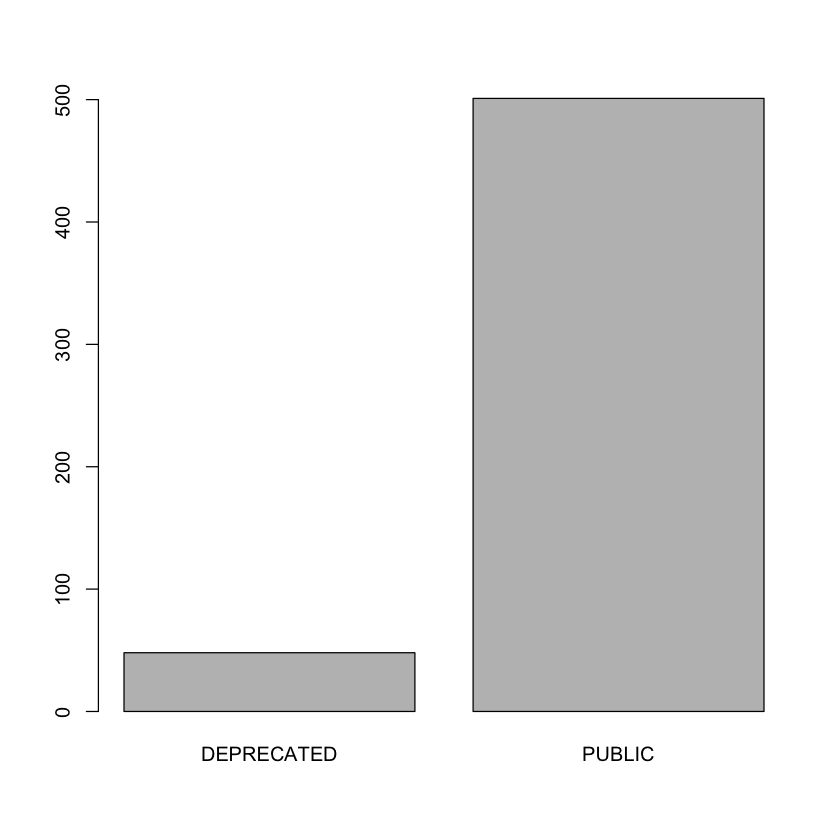

In [4]:
barplot(table(DT$attributes.status))

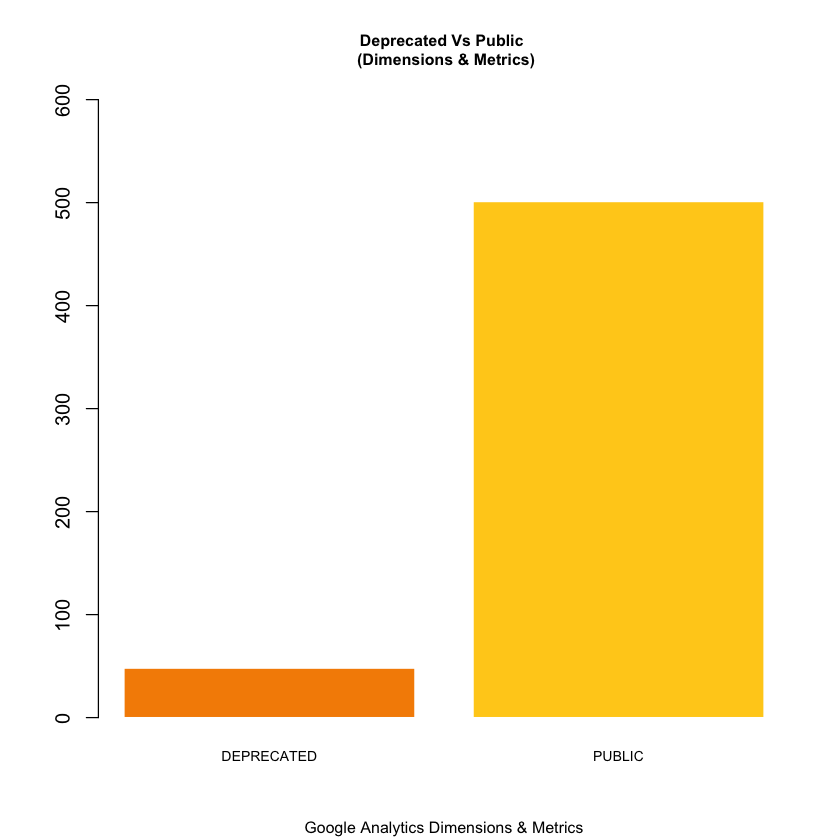

In [5]:
barplot(table(DT$attributes.status), main="Deprecated Vs Public \n (Dimensions & Metrics)", sub = "Google Analytics Dimensions & Metrics",  col=c("#F58D00","#FFCE1C"), cex.main=.8, cex.sub=.8, cex.names =.7, border = "white",  ylim=c(0,1.2*max(unlist(table(DT$attributes.status)))))